# CheckPoint 1 - Part 1

In [46]:
# Importing important libraries
import pandas as pd
import numpy as np
import sys
import re
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import datasets and read them into Dataframe

rounds2 = pd.read_csv('rounds2.csv', encoding = 'ISO 8859-1')
companies = pd.read_csv('companies.csv', encoding = 'ISO 8859-1')

In [3]:
# Lets try inspecting the datasets one by one, and see if the encoding and values are correct
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [4]:
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [5]:
#As seen above the columns 'permalink' and 'name' still has encoding issue, we need to encode the column with 'utf-8' encoding and then decode by 'ascii'

companies['permalink'] = companies['permalink'].str.encode('utf-8').str.decode('ascii', 'ignore').str.lower()
companies['name'] = companies['name'].str.encode('utf-8').str.decode('ascii', 'ignore').str.lower()

In [6]:
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/organization/zznode-science-and-technology-co...,zznode science and technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/organization/eron,eron,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/organization/novatiff-reklam-ve-tantm-hizmetl...,novatiff reklam ve tantm hizmetleri tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [7]:
# Inspecting and correcting the rounds2 dataframe
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [8]:
# The rounds2 dataframe also has the same encoding issue.
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('utf-8').str.decode('ascii','ignore').str.lower()
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [9]:
#Checkpoint 1: Question 1 (how many unique companies are present in rounds2 dataset?)

rounds2_companies = rounds2['company_permalink'].nunique()
print(rounds2_companies)

66368


In [10]:
#Checkpoint 1: Question 2 (how many unique companies are present in companies dataset?)

unique_companies = companies['permalink'].nunique()
print(unique_companies)

66368


In [11]:
#Checkpoint 1: Question 4 (Are there any companies in the rounds2 file which are not present in companies?)

def check_company(rounds2, companies):
    for companies in rounds2:
        for company in companies:
            if companies == company:
                return True
            else:
                return False

In [12]:
check_company(rounds2,companies)

False

In [13]:
#Checkpoint 1: Question 5 (Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?)

master_frame = companies.merge(rounds2, how = 'inner', left_on = 'permalink', right_on = 'company_permalink')

In [14]:
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,eron,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


#  Checkpoint 2: Funding Type Analysis

In [15]:
#Inspecting data

master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,eron,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [16]:
# Obtaining number of null values for each column

master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [17]:
# Representational value of investment types before cleaning the data(before handling nan and 0 values)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False)

funding_round_type
post_ipo_debt           168704571.82
post_ipo_equity          82182493.87
secondary_market         79649630.10
private_equity           73308593.03
undisclosed              19242370.23
debt_financing           17043526.02
venture                  11748949.13
grant                     4300576.34
convertible_note          1453438.54
product_crowdfunding      1363131.07
angel                      958694.47
seed                       719818.00
equity_crowdfunding        538368.21
non_equity_assistance      411203.05
Name: raised_amount_usd, dtype: float64

In [18]:
# Checking NAN values for the four investment types

nan_count = pd.DataFrame(master_frame.groupby(['funding_round_type'])['raised_amount_usd'].value_counts(dropna = False))

venture = nan_count.loc['venture'].iloc[0]
angel = nan_count.loc['angel'].iloc[0]
private_equity = nan_count.loc['private_equity'].iloc[0]
seed = nan_count.loc['seed'].iloc[0]

# Print the NAN values for the types of investment

print(f" The NAN value count for Seed investment type is: {seed[0]}",
      f"\n The NAN value count for Venture investment type is: {venture[0]}",
      f"\n The NAN value count for Angel investment type is: {angel[0]}",
      f"\n The NAN value count for Private Equity investment type is: {private_equity[0]}")

 The NAN value count for Seed investment type is: 6921 
 The NAN value count for Venture investment type is: 5266 
 The NAN value count for Angel investment type is: 1234 
 The NAN value count for Private Equity investment type is: 349


In [19]:
# Drop the NAN values and 0 values from the raised_amunt_usd column

master_frame.drop(master_frame[master_frame['raised_amount_usd'].isnull()].index, inplace = True)
master_frame.drop(master_frame[master_frame['raised_amount_usd'] == 0].index, inplace = True)

In [20]:
# After Cleaning

master_frame.shape

(94544, 16)

In [21]:
# Representational value of investment types after cleaning

master_frame.groupby('funding_round_type').mean().loc[['venture','angel','seed','private_equity']]

,raised_amount_usd
funding_round_type,
venture,11755736.51
angel,964848.86
seed,722726.91
private_equity,73422367.36


In [22]:
# Filter master_frame so that i only contains venture capital data

venture_frame = master_frame.loc[master_frame['funding_round_type'] == 'venture']
venture_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00
8,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00
10,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114931,/organization/zyraz-technology,zyraz technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994,/organization/zyraz-technology,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.00
114934,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.00
114936,/organization/zystor,zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.00
114937,/organization/zytoprotec,zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.00


# Checkpoint 3: Country Analysis

In [23]:
# Finding the top9 funded countries

top9 = pd.DataFrame(venture_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending = False))
top9 = top9.head(9) #.reset_index(inplace = True)

In [24]:
print(top9)

              raised_amount_usd
country_code                   
USA             422510842796.00
CHN              39835418773.00
GBR              20245627416.00
IND              14391858718.00
CAN               9583332317.00
FRA               7259536732.00
ISR               6907514579.00
DEU               6346959822.00
JPN               3363676611.00


In [25]:
# From the above dicttionary we can identify that english speaking country from the wiki link
# https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language

# SO, the top 3 english speaking companies that is - USA,GBR,IND

# Checkpoint 4: Sector Analysis 1

Task 1: Extract the `primary sector` from category_list in venture_frame dataframe by extracting the set of characters before the first '|'

In [26]:
venture_frame['primary_sector'] = venture_frame['category_list'].str.split('|').str[0]
venture_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,Media
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,Apps
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,Curated Web
8,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,Biotechnology
10,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,Analytics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114931,/organization/zyraz-technology,zyraz technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994,/organization/zyraz-technology,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.00,Biotechnology
114934,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.00,E-Commerce
114936,/organization/zystor,zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.00,Biotechnology
114937,/organization/zytoprotec,zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.00,Biotechnology


Task 2: Use the mapping file `mapping.csv` to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [27]:
# Import and clean the mapping.csv file

mapping = pd.read_csv('mapping.csv')

mapping.set_index('category_list')
mapping.replace({'category_list' : '0'}, {'category_list' : 'na'},regex = True, inplace = True)
mapping = mapping.dropna()

#Unpivot mapping dataframe on category_list column
mapping = mapping.melt(id_vars="category_list",var_name="main_sectors")

#Map the category_list to main_sectors where value is not = 0
mapping = mapping.loc[~(mapping["value"]==0)]


#check if we can fetch a row for a category
#mapping.loc[mapping['category_list'].isin(['Advice'])]

In [28]:
venture_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,Media
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,Apps
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,Curated Web
8,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,Biotechnology
10,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,Analytics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114931,/organization/zyraz-technology,zyraz technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994,/organization/zyraz-technology,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.00,Biotechnology
114934,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.00,E-Commerce
114936,/organization/zystor,zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.00,Biotechnology
114937,/organization/zytoprotec,zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.00,Biotechnology


In [29]:
# Merge the venture_frame dataframe and mapping dataframe

venture_mapping_frame = pd.merge(venture_frame, mapping, how = 'inner', left_on = 'primary_sector', right_on = 'category_list')
venture_mapping_frame.drop(['value', 'category_list_y', 'category_list_x'], axis = 1, inplace = True)

venture_mapping_frame

,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sectors
0,/organization/-fame,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.00,Media,Entertainment
4,/organization/all-def-digital,all def digital,http://alldefdigital.com,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49502,/organization/yapta,yapta,http://www.yapta.com,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2000000.00,Tracking,Others
49503,/organization/yapta,yapta,http://www.yapta.com,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1786563.00,Tracking,Others
49504,/organization/yunnan-landsun-green-industry-gr...,yunnan landsun green industry (group),http://www.lstea.tech-food.com/,operating,CHN,29,CHN - Other,Simao,01-05-1996,/organization/yunnan-landsun-green-industry-gr...,/funding-round/83783f2b5911f41827bd6c72c1eee7fc,venture,NaN,01-07-2007,7227332.00,Tea,Others
49505,/organization/ziftit,ziftit,http://www.ziftit.com,closed,USA,CA,San Diego,San Diego,01-02-2011,/organization/ziftit,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,NaN,09-07-2013,4000000.00,Gift Registries,Others


# Checkpoint 5: Sector Analysis 2

Create three separate data frames D1, D2 and D3 for each of the three countries 

In [30]:
# D1 dataframe for country_code = USA
D1 = venture_mapping_frame[(venture_mapping_frame['country_code'] == 'USA') & (venture_mapping_frame['raised_amount_usd'] >= 5000000) & (venture_mapping_frame['raised_amount_usd'] <= 15000000)] 

#top9_df[(top9_df['country_code'] == 'IND'

# D2 dataframe for country_code = GBR
D2 = venture_mapping_frame[(venture_mapping_frame['country_code'] == 'GBR') & (venture_mapping_frame['raised_amount_usd'] >= 5000000) & (venture_mapping_frame['raised_amount_usd'] <= 15000000)] 

# D3 dataframe for country_code = IND
D3 = venture_mapping_frame[(venture_mapping_frame['country_code'] == 'IND') & (venture_mapping_frame['raised_amount_usd'] >= 5000000) & (venture_mapping_frame['raised_amount_usd'] <= 15000000)] 

In [31]:
# Total number of Investment count for D1 that is USA
print(" Total Investment count for D1:",D1.raised_amount_usd.count())

# Total number of Investment count for D2 that is GBR
print("\n","Total Investment count for D2:",D2.raised_amount_usd.count())

# Total number of Investment count for D3 that is IND
print("\n","Total Investment count for D3:",D3.raised_amount_usd.count())

 Total Investment count for D1: 12012

 Total Investment count for D2: 619

 Total Investment count for D3: 328


In [32]:
TIC_D1=pd.DataFrame(D1.groupby(by='main_sectors')['main_sectors'].count().
                     rename('Total_Investment_Count').sort_values(ascending = False))

TIC_D2=pd.DataFrame(D2.groupby(by='main_sectors')['main_sectors'].count().
                     rename('Total_Investment_Count').sort_values(ascending = False))


TIC_D3=pd.DataFrame(D3.groupby(by='main_sectors')['main_sectors'].count().
                     rename('Total_Investment_Count').sort_values(ascending = False))


In [33]:
# Total amount of investment (USD)
print("Total amount invested in USA (D1):",D1.raised_amount_usd.sum())

print("Total amount invested in GBR (D2):",D2.raised_amount_usd.sum())

print("Total amount invested in USA (D3):",D3.raised_amount_usd.sum())

Total amount invested in USA (D1): 107318294664.0
Total amount invested in GBR (D2): 5365228300.0
Total amount invested in USA (D3): 2949543602.0


In [34]:
# Top sectors based on count on investment for D1
D1.groupby('main_sectors')['raised_amount_usd'].count().sort_values(ascending = False)

main_sectors
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
News, Search and Messaging                 1582
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [35]:
# Top sectors based on count on investment for D2
D2.groupby('main_sectors')['raised_amount_usd'].count().sort_values(ascending = False)

main_sectors
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [36]:
# Top sectors based on count on investment for D2
D3.groupby('main_sectors')['raised_amount_usd'].count().sort_values(ascending = False)

main_sectors
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [37]:
# Top Company to receive highest investment for the best performing sector in USA
D1.where(D1.main_sectors == 'Others').groupby('name').raised_amount_usd.sum().sort_values(ascending = False)

name
virtustream             64300000.00
capella photonics       54968051.00
airtight networks       54201907.00
decarta                 52100000.00
black duck software     51000000.00
                            ...    
coalfire                 5000000.00
clk design automation    5000000.00
trustyou                 5000000.00
clique intelligence      5000000.00
peek kids                5000000.00
Name: raised_amount_usd, Length: 2049, dtype: float64

In [38]:
# Top Company to receive highest investment for the best performing sector in GBR
D2.where(D2.main_sectors == 'Others').groupby('name').raised_amount_usd.sum().sort_values(ascending = False)

name
electric cloud            37000000.00
sensage                   36250000.00
enigmatec                 32500000.00
silverrail technologies   29000000.00
opencloud                 27972766.00
                              ...    
vector watch               5000000.00
bullguard                  5000000.00
udex                       5000000.00
the filter                 5000000.00
bacula systems             5000000.00
Name: raised_amount_usd, Length: 120, dtype: float64

In [39]:
# Top Company to receive highest investment for the best performing sector in IND
D3.where(D3.main_sectors == 'Others').groupby('name').raised_amount_usd.sum().sort_values(ascending = False)

name
firstcry.com          39000000.00
myntra                38000000.00
commonfloor           32900000.00
pepperfry.com         28000000.00
itzcash card ltd.     25000000.00
                          ...    
liases foras           5000000.00
securens               5000000.00
appsdaily solutions    5000000.00
tastykhana             5000000.00
reznext                5000000.00
Name: raised_amount_usd, Length: 88, dtype: float64

# Checkpoint 6: Plots

`Plot 1:` A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

In [40]:
# Preprocessing plotting data
plot_frame = pd.DataFrame(master_frame.loc[(master_frame['funding_round_type'] == 'seed') | (master_frame['funding_round_type'] == 'angel') | (master_frame['funding_round_type'] == 'venture') | (master_frame['funding_round_type'] == 'private_equity')])
plot_frame = plot_frame.groupby('funding_round_type')['raised_amount_usd'].sum()

plot_frame

funding_round_type
angel              4659255123.00
private_equity   141925436105.00
seed              16989864181.00
venture          590126216876.00
Name: raised_amount_usd, dtype: float64

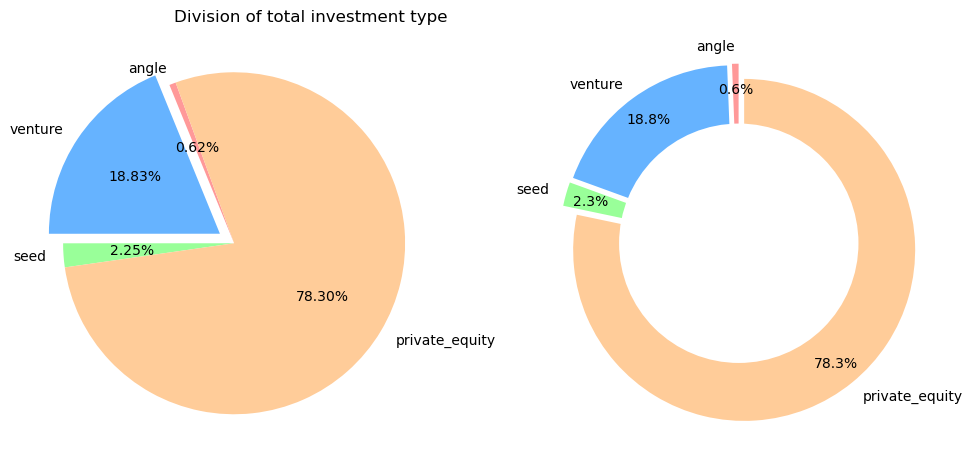

In [42]:
import matplotlib.pyplot as plt

# subplot 1 - Piechart
plt.figure(figsize=[10,10], dpi = 100)
plt.subplot(221)
plt.title('Division of total investment type', loc = 'right')

labels = 'angle', 'venture', 'seed', 'private_equity'
a=np.random.random(40)
cs = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0, 0.1, 0, 0)
# Plot
plt.pie(plot_frame,explode = explode,colors = cs, labels=labels,autopct='%1.2f%%', startangle=110)

# subplot 2- donut chart
plt.subplot(222)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.05,0.05,0.05,0.05)

plt.pie(plot_frame, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio
#ax1.axis('equal')  
plt.tight_layout()

`plot 2:` A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.        

Plot 2: A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.        

In [43]:
Eng_speaking_country=pd.DataFrame({'country_code': ['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'],
                        'English_Speaking_Flag': ['Yes','No','Yes','Yes','Yes','No','Yes','No','No']})

top9=pd.merge(top9,Eng_speaking_country,how='inner',on='country_code')

In [44]:
top9

,country_code,raised_amount_usd,English_Speaking_Flag
0,USA,422510842796.00,Yes
1,CHN,39835418773.00,No
2,GBR,20245627416.00,Yes
3,IND,14391858718.00,Yes
4,CAN,9583332317.00,Yes
5,FRA,7259536732.00,No
6,ISR,6907514579.00,Yes
7,DEU,6346959822.00,No
8,JPN,3363676611.00,No


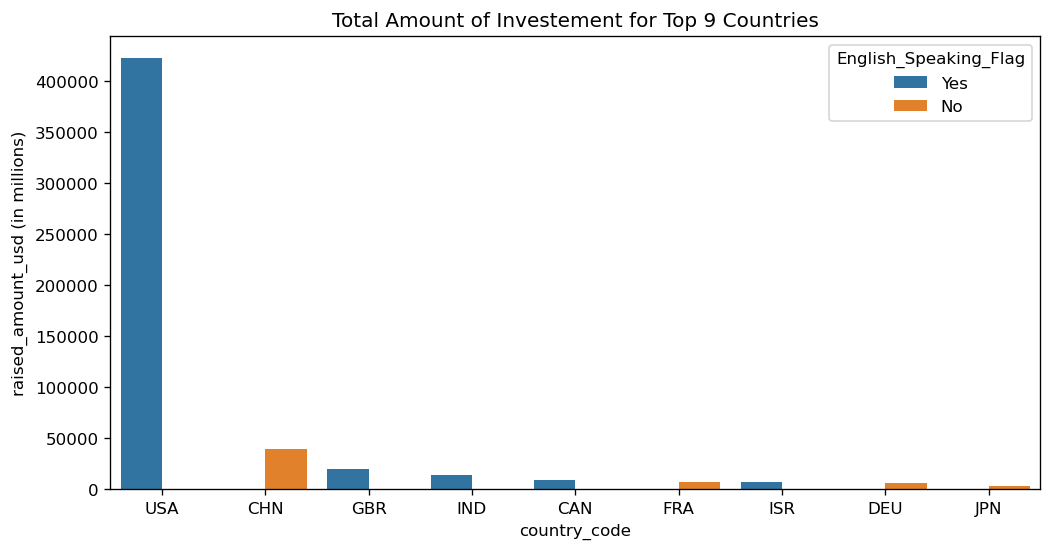

In [47]:
plt.figure(figsize=[10.0,5.0],dpi=120,frameon=True)
sns.barplot(x=top9['country_code'],y=top9['raised_amount_usd']/1000000,hue=top9['English_Speaking_Flag'],ci=None)
plt.ylabel("raised_amount_usd (in millions)")
plt.title("Total Amount of Investement for Top 9 Countries") 
plt.show()


`Plot 3:` A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [ ]:
TIC_D1.reset_index(inplace=True)
TIC_D2.reset_index(inplace=True)
TIC_D3.reset_index(inplace=True)

TIC_D1 = TIC_D1.sort_values(by='Total_Investment_Count',ascending = False).head(n=3)
TIC_D1['Country'] = 'USA'
TIC_D2 = TIC_D2.sort_values(by='Total_Investment_Count',ascending = False).head(n=3)
TIC_D2['Country'] = 'GBR'
TIC_D3 = TIC_D3.sort_values(by='Total_Investment_Count',ascending = False).head(n=3)
TIC_D3['Country'] = 'IND'

TIC=pd.merge(pd.merge(TIC_D1,TIC_D2,how='outer'),TIC_D3,how='outer')

TIC

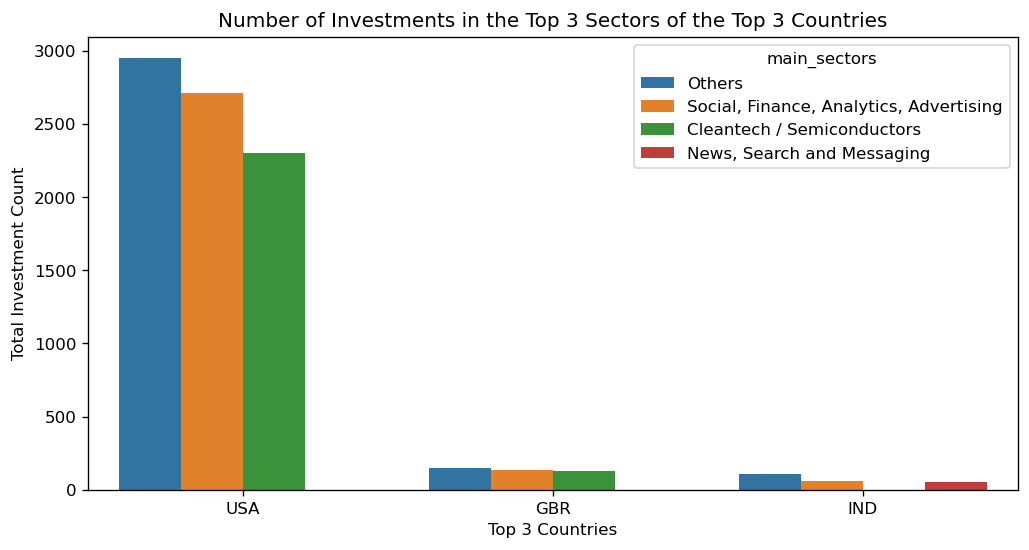

In [338]:
plt.figure(figsize=[10.0,5.0],dpi=120,frameon=True)
sns.barplot(x='Country', y='Total_Investment_Count', hue='main_sectors',data=TIC)
plt.ylabel("Total Investment Count")
plt.xlabel("Top 3 Countries")
plt.title("Number of Investments in the Top 3 Sectors of the Top 3 Countries") 
plt.show()